In [78]:
from algorithms import draper
from matplotlib import pyplot
import numpy as np
from qiskit import QuantumProgram, QuantumRegister, QuantumCircuit, Result

In [121]:
def plot_results(results_sim, results_real):
    data_sim: dict = result_sim["qasms"][0]["data"]["counts"]
    data_real: dict = result_real["qasms"][0]["data"]["counts"]
    keys1 = list(data_sim.keys())
    keys2 = list(data_real.keys())
    keys = sorted(set(keys1 + keys2))
    
    sim_vals = [data_sim[k] if k in data_sim else 0 for k in keys]
    real_vals = [data_real[k] if k in data_real else 0 for k in keys]
    
    pyplot.bar(np.arange(len(keys)) - 0.2,sim_vals, width=0.3, align="center", color="r")
    pyplot.bar(np.arange(len(keys)) + 0.2,real_vals, width=0.3, align="center", color="b")
    pyplot.xticks(np.arange(len(keys)), keys, rotation=90)
    pyplot.show()

In [2]:
token = "a6c65f024279c033c9368bd14e6f9079b71fdfd00625b1f3d3573475c97d84d429c8b4316aa572709dd2670e9a069e735f127342360a7ec6bd8f17f82a997ba2"
url = 'https://quantumexperience.ng.bluemix.net/api'

In [3]:
Q_program: QuantumProgram = QuantumProgram()
Q_program.set_api(token, url)

In [4]:
for backend in Q_program.available_backends():
    status = Q_program.get_backend_status(backend)
    print("%s: %s" % (backend, status))

ibmqx4: {'available': True, 'busy': False, 'pending_jobs': 0, 'backend': 'ibmqx4'}


ibmqx5: {'available': True, 'busy': False, 'pending_jobs': 2, 'backend': 'ibmqx5'}


ibmqx2: {'available': False, 'busy': False, 'pending_jobs': 2553, 'backend': 'ibmqx2'}


ibmqx_qasm_simulator: {'available': True, 'busy': False, 'pending_jobs': 0, 'backend': 'ibmqx_qasm_simulator'}
local_qasm_simulator: {'available': True}
local_unitary_simulator: {'available': True}


In [5]:
# Backend parameters
backend_local_simulator = "local_qasm_simulator"
backend_real_processor = "ibmqx4"
backend_online_simulator = "ibmqx_qasm_simulator"

# input
name = "draper"
shots = 1000
max_credits = 3

In [86]:
Q_program.get_api().get_my_credits()

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

# Draper Experiment 10 + 00 = 10

In [87]:
qasm, expected = draper.create_experiment(Q_program, "0b10", "0b00" ,name, backend_real_processor)

Job: 0b10 + 0b00 = 0b10. Expecting answer: 00100
a1 setting to 1


In [88]:
job_result = Q_program.get_api().run_job([ {"qasm": qasm} ], backend_online_simulator, shots, max_credits)
jobId = job_result["id"]
print("Job Id: %s" % jobId)

Job Id: c2c7c6e0341b389234b4004a44ec7921


In [89]:
result_sim = Q_program.get_api().get_job(jobId)
result_sim["status"]

'COMPLETED'

In [90]:
job_result = Q_program.get_api().run_job([ {"qasm": qasm} ], backend_real_processor, shots, max_credits)
jobId = job_result["id"]
print("Job Id: %s" % jobId)

Job Id: 02ef6ccee5c8a023d447b48a383832ae


In [103]:
result_real = Q_program.get_api().get_job(jobId)
result_real["status"]

'COMPLETED'

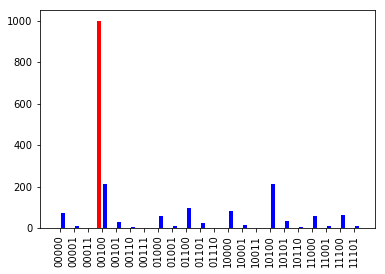

In [122]:
plot_results(result_sim, result_real)

In [123]:
result_sim

{'backend': {'name': 'simulator'},
 'calibration': {},
 'creationDate': '2017-11-04T21:51:16.880Z',
 'deleted': False,
 'id': 'c2c7c6e0341b389234b4004a44ec7921',
 'maxCredits': 3,
 'qasms': [{'data': {'additionalData': {'seed': 3726169778},
    'counts': {'00100': 1000},
    'creg_labels': 'ans[5]',
    'date': '2017-11-04T21:51:17.564Z',
    'time': 0.278681},
   'executionId': '8730a4967efc254e25e5f62cf83bb483',
   'qasm': '// draper(0b10,0b00)->00100\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg ans[5];\nu2(0.0,3.141592653589793) q[4];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu2(0.0,3.141592653589793) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(-0.0) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(0.0) q[2];\nu2(0.0,3.141592653589793) q[2];\ncx q[2],q[4];\nu2(0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(0.392699081698724) q[2];\nu3(3.14159265

In [124]:
result_real

{'backend': {'id': 'c16c5ddebbf8922a7e2a0f5a89cac478', 'name': 'ibmqx4'},
 'calibration': {'fridgeParameters': {'Temperature': {'date': '2017-11-04T11:04:48Z',
    'unit': 'K',
    'value': 0.021},
   'cooldownDate': '2017-09-07'},
  'lastUpdateDate': '2017-11-04T11:04:48.000Z',
  'multiQubitGates': [{'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.01615396499543653},
    'name': 'CX1_0',
    'qubits': [1, 0],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z', 'value': 0.0191899465691589},
    'name': 'CX2_0',
    'qubits': [2, 0],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.02277376652218968},
    'name': 'CX2_1',
    'qubits': [2, 1],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.03555818582605408},
    'name': 'CX2_4',
    'qubits': [2, 4],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.02033851467949027},
    'name': 'CX3_2',
    'qub

# Draper Experiment 01 + 01 = 10

In [126]:
qasm, expected = draper.create_experiment(Q_program, "0b01", "0b01" ,name, backend_real_processor)

Job: 0b01 + 0b01 = 0b10. Expecting answer: 01100
a2 setting to 1
b2 setting to 1


In [127]:
job_result = Q_program.get_api().run_job([ {"qasm": qasm} ], backend_online_simulator, shots, max_credits)
jobId = job_result["id"]
print("Job Id: %s" % jobId)

Job Id: 2ff3dbadd314b8ad65277ca93c535930


In [128]:
result_sim = Q_program.get_api().get_job(jobId)
result_sim["status"]

'COMPLETED'

In [129]:
job_result = Q_program.get_api().run_job([ {"qasm": qasm} ], backend_real_processor, shots, max_credits)
jobId = job_result["id"]
print("Job Id: %s" % jobId)

Job Id: 7c6044caf7fdb2127701f759874cedaf


In [135]:
result_real = Q_program.get_api().get_job(jobId)
result_real["status"]

'COMPLETED'

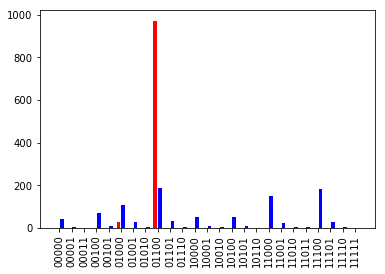

In [136]:
plot_results(result_sim, result_real)

In [131]:
result_sim

{'backend': {'name': 'simulator'},
 'calibration': {},
 'creationDate': '2017-11-04T22:04:21.171Z',
 'deleted': False,
 'id': '2ff3dbadd314b8ad65277ca93c535930',
 'maxCredits': 3,
 'qasms': [{'data': {'additionalData': {'seed': 45881271},
    'counts': {'01000': 28, '01100': 972},
    'creg_labels': 'ans[5]',
    'date': '2017-11-04T22:04:21.971Z',
    'time': 0.18468},
   'executionId': '685d3f8b67b4763d17c9a500ae5263c3',
   'qasm': '// draper(0b01,0b01)->01100\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg ans[5];\nu3(3.141592653589793,0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[4];\nu3(3.141592653589793,0.0,3.141592653589793) q[3];\nu2(0.0,3.141592653589793) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(-0.0) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(0.0) q[2];\nu2(0.0,3.141592653589793) q[2];\ncx q[2],q[4];\nu2(0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[2];\nu3(3.141592653589793,0.0,3.141592

In [137]:
result_real

{'backend': {'id': 'c16c5ddebbf8922a7e2a0f5a89cac478', 'name': 'ibmqx4'},
 'calibration': {'fridgeParameters': {'Temperature': {'date': '2017-11-04T11:04:48Z',
    'unit': 'K',
    'value': 0.021},
   'cooldownDate': '2017-09-07'},
  'lastUpdateDate': '2017-11-04T11:04:48.000Z',
  'multiQubitGates': [{'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.01615396499543653},
    'name': 'CX1_0',
    'qubits': [1, 0],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z', 'value': 0.0191899465691589},
    'name': 'CX2_0',
    'qubits': [2, 0],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.02277376652218968},
    'name': 'CX2_1',
    'qubits': [2, 1],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.03555818582605408},
    'name': 'CX2_4',
    'qubits': [2, 4],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.02033851467949027},
    'name': 'CX3_2',
    'qub

# Draper Experiment 00 + 11 = 11

In [138]:
qasm, expected = draper.create_experiment(Q_program, "0b00", "0b11" ,name, backend_real_processor)

Job: 0b00 + 0b11 = 0b11. Expecting answer: 11101
b1 setting to 1
b2 setting to 1


In [139]:
job_result = Q_program.get_api().run_job([ {"qasm": qasm} ], backend_online_simulator, shots, max_credits)
jobId = job_result["id"]
print("Job Id: %s" % jobId)

Job Id: 53d5949ba43433b55819b1a2a12b4b24


In [140]:
result_sim = Q_program.get_api().get_job(jobId)
result_sim["status"]

'COMPLETED'

In [141]:
job_result = Q_program.get_api().run_job([ {"qasm": qasm} ], backend_real_processor, shots, max_credits)
jobId = job_result["id"]
print("Job Id: %s" % jobId)

Job Id: d071b88152d98cfb0a71ce3dc2d589fb


In [148]:
result_real = Q_program.get_api().get_job(jobId)
result_real["status"]

'COMPLETED'

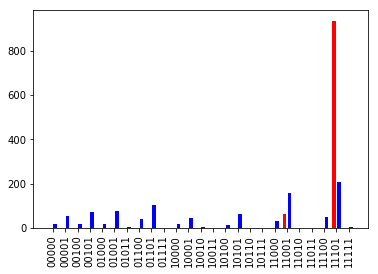

In [149]:
plot_results(result_sim, result_real)

In [143]:
result_sim

{'backend': {'name': 'simulator'},
 'calibration': {},
 'creationDate': '2017-11-04T22:08:27.390Z',
 'deleted': False,
 'id': '53d5949ba43433b55819b1a2a12b4b24',
 'maxCredits': 3,
 'qasms': [{'data': {'additionalData': {'seed': 2798186379},
    'counts': {'11001': 64, '11101': 936},
    'creg_labels': 'ans[5]',
    'date': '2017-11-04T22:08:28.018Z',
    'time': 0.274874},
   'executionId': '3bfd39c8600e46f15f90b24b78c4b205',
   'qasm': '// draper(0b00,0b11)->11101\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg ans[5];\nu2(0.0,3.141592653589793) q[4];\nu3(3.141592653589793,0.0,3.141592653589793) q[3];\nu2(0.0,3.141592653589793) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(-0.0) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(0.0) q[2];\nu2(0.0,3.141592653589793) q[2];\ncx q[2],q[4];\nu2(0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(0.392699081698724) q[2];\nu

In [150]:
result_real

{'backend': {'id': 'c16c5ddebbf8922a7e2a0f5a89cac478', 'name': 'ibmqx4'},
 'calibration': {'fridgeParameters': {'Temperature': {'date': '2017-11-04T11:04:48Z',
    'unit': 'K',
    'value': 0.021},
   'cooldownDate': '2017-09-07'},
  'lastUpdateDate': '2017-11-04T11:04:48.000Z',
  'multiQubitGates': [{'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.01615396499543653},
    'name': 'CX1_0',
    'qubits': [1, 0],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z', 'value': 0.0191899465691589},
    'name': 'CX2_0',
    'qubits': [2, 0],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.02277376652218968},
    'name': 'CX2_1',
    'qubits': [2, 1],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.03555818582605408},
    'name': 'CX2_4',
    'qubits': [2, 4],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.02033851467949027},
    'name': 'CX3_2',
    'qub

# Draper Experiment 00 + 00 = 00

In [151]:
qasm, expected = draper.create_experiment(Q_program, "0b00", "0b00" ,name, backend_real_processor)

Job: 0b00 + 0b00 = 0b0. Expecting answer: 00000


In [152]:
job_result = Q_program.get_api().run_job([ {"qasm": qasm} ], backend_online_simulator, shots, max_credits)
jobId = job_result["id"]
print("Job Id: %s" % jobId)

Job Id: 53d5949ba43433b55819b1a2a1b846e0


In [153]:
result_sim = Q_program.get_api().get_job(jobId)
result_sim["status"]

'COMPLETED'

In [154]:
job_result = Q_program.get_api().run_job([ {"qasm": qasm} ], backend_real_processor, shots, max_credits)
jobId = job_result["id"]
print("Job Id: %s" % jobId)

Job Id: 53d5949ba43433b55819b1a2a1cda65c


In [165]:
result_real = Q_program.get_api().get_job(jobId)
result_real["status"]

'COMPLETED'

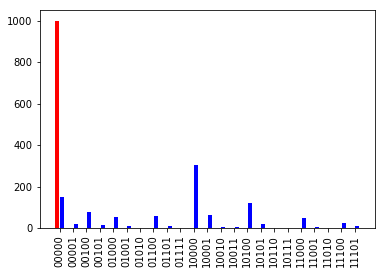

In [166]:
plot_results(result_sim, result_real)

In [156]:
result_sim

{'backend': {'name': 'simulator'},
 'calibration': {},
 'creationDate': '2017-11-04T22:10:28.212Z',
 'deleted': False,
 'id': '53d5949ba43433b55819b1a2a1b846e0',
 'maxCredits': 3,
 'qasms': [{'data': {'additionalData': {'seed': 2031335199},
    'counts': {'00000': 1000},
    'creg_labels': 'ans[5]',
    'date': '2017-11-04T22:10:29.011Z',
    'time': 0.270998},
   'executionId': '53d5949ba43433b55819b1a2a1b84880',
   'qasm': '// draper(0b00,0b00)->00000\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg ans[5];\nu2(0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(-0.0) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(0.0) q[2];\nu2(0.0,3.141592653589793) q[2];\ncx q[2],q[4];\nu2(0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[4];\nu2(0.0,3.141592653589793) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(0.392699081698724) q[2];\nu3(3.141592653589793,0.0,3.141592653589793) q[2];\nu1(-0.3926990

In [167]:
result_real

{'backend': {'id': 'c16c5ddebbf8922a7e2a0f5a89cac478', 'name': 'ibmqx4'},
 'calibration': {'fridgeParameters': {'Temperature': {'date': '2017-11-04T11:04:48Z',
    'unit': 'K',
    'value': 0.021},
   'cooldownDate': '2017-09-07'},
  'lastUpdateDate': '2017-11-04T11:04:48.000Z',
  'multiQubitGates': [{'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.01615396499543653},
    'name': 'CX1_0',
    'qubits': [1, 0],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z', 'value': 0.0191899465691589},
    'name': 'CX2_0',
    'qubits': [2, 0],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.02277376652218968},
    'name': 'CX2_1',
    'qubits': [2, 1],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.03555818582605408},
    'name': 'CX2_4',
    'qubits': [2, 4],
    'type': 'CX'},
   {'gateError': {'date': '2017-11-04T11:04:48Z',
     'value': 0.02033851467949027},
    'name': 'CX3_2',
    'qub